In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 인코딩 문제 해결 코드
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

데이터 불러오기

In [2]:
train_004 = pd.read_csv("./nasa-cmaps/versions/1/CMaps/train_FD004.txt", sep=' ', header=None)
train_004 = train_004.dropna(axis=1, how='all')  # 빈 컬럼 제거

# 컬럼 이름 넣기
col_names = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
train_004.columns = col_names
train_004

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [3]:
test_004 = pd.read_csv("./nasa-cmaps/versions/1/CMaps/test_FD004.txt", sep=' ', header=None)
test_004 = test_004.dropna(axis=1, how='all')  # 빈 컬럼 제거

col_names = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']
test_004.columns = col_names
test_004

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [4]:
RUL_004 = pd.read_csv("./nasa-cmaps/versions/1/CMaps/RUL_FD004.txt", sep=' ', header=None)
RUL_004 = RUL_004.rename(columns={0: 'RUL'})
RUL_004 = RUL_004.dropna(axis=1, how='all')  # 빈 컬럼 제거
RUL_004

,RUL
0,22
1,39
2,107
3,75
4,149
...,...
243,35
244,131
245,194
246,112


In [5]:
train_004.loc[train_004['unit'] == 1, 'cycle']

0        1
1        2
2        3
3        4
4        5
      ... 
316    317
317    318
318    319
319    320
320    321
Name: cycle, Length: 321, dtype: int64

- setting_1 : 

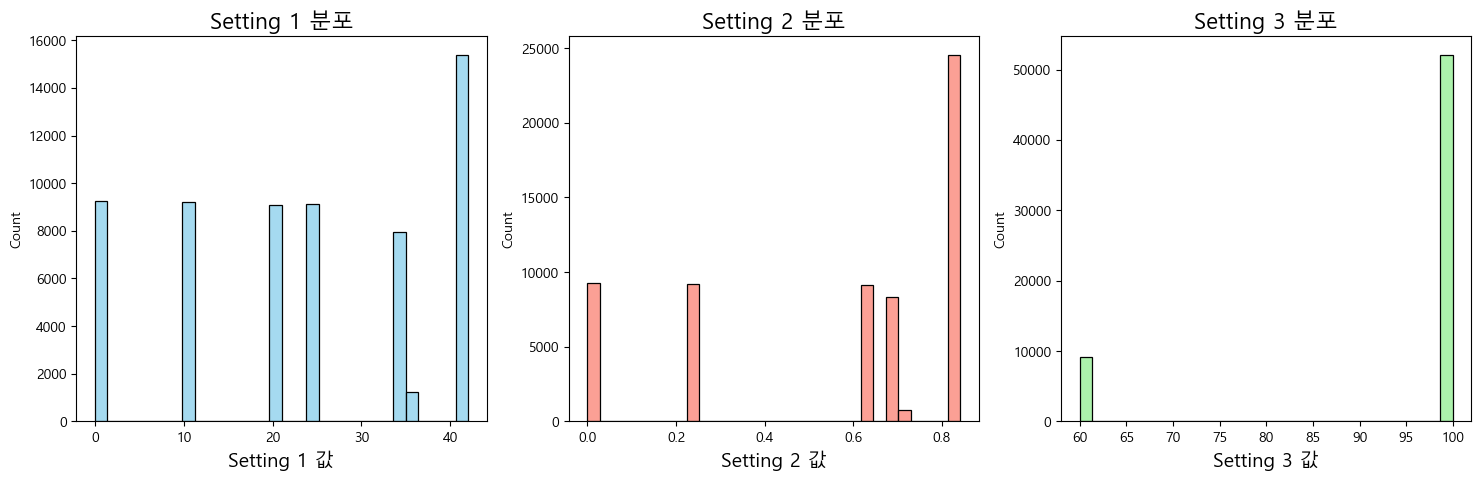

<Figure size 1800x500 with 0 Axes>

In [6]:
# setting_1 ~ 3의 분포 시각화
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.figure(figsize=(18, 5))

# setting_1
sns.histplot(train_004['setting_1'], bins=30, ax=ax[0], color='skyblue')
ax[0].set_title('Setting 1 분포', fontsize=16)
ax[0].set_xlabel('Setting 1 값', fontsize=14)

# setting_2
sns.histplot(train_004['setting_2'], bins=30, ax=ax[1], color='salmon')
ax[1].set_title('Setting 2 분포', fontsize=16)
ax[1].set_xlabel('Setting 2 값', fontsize=14)

# setting_3
sns.histplot(train_004['setting_3'], bins=30, ax=ax[2], color='lightgreen')
ax[2].set_title('Setting 3 분포', fontsize=16)
ax[2].set_xlabel('Setting 3 값', fontsize=14)
plt.tight_layout()
plt.show();

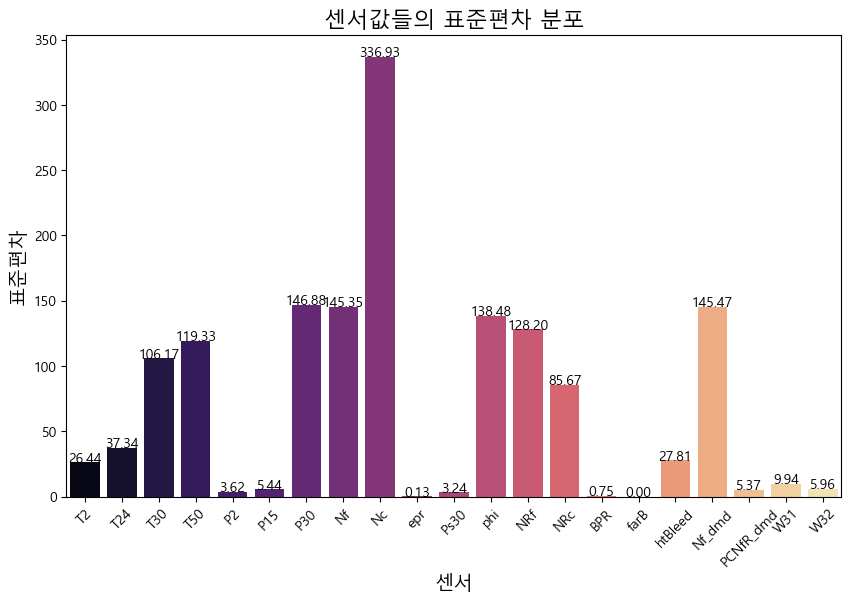

In [7]:
# 센서값들의 표준편차 분포
sensor_cols = col_names[5:]  # 센서 컬럼들
sensor_std = train_004[sensor_cols].std()
plt.figure(figsize=(10, 6))
sns.barplot(x=sensor_std.index, y=sensor_std.values, hue=sensor_std.index, palette='magma')
# 각 바의 값 표시
for i, v in enumerate(sensor_std.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.title('센서값들의 표준편차 분포', fontsize=16)
plt.xlabel('센서', fontsize=14)
plt.ylabel('표준편차', fontsize=14)
plt.show();

In [8]:
# 주요 센서 변수 도출
feature = ['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'phi', 'NRf', 'NRc', 'htBleed', 'Nf_dmd']
feature_df = train_004[feature]
feature_df

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,129.78,2387.99,8074.83,330,2212
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,312.59,2387.73,8046.13,361,2324
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,129.62,2387.97,8066.62,329,2212
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,129.80,2388.02,8076.05,328,2212
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,164.11,2028.08,7865.80,305,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,380.16,2388.73,8185.69,372,2319
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,535.02,2388.46,8185.47,396,2388
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,535.41,2388.48,8193.94,395,2388
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,187.92,2388.83,8125.64,337,2223


In [9]:
# RUL 잔여수명 계산 함수
def get_RUL(df):
    for unit in df['unit'].unique():
        unit_max_cycle = max(df.loc[df['unit'] == unit, 'cycle'])
        df.loc[df['unit'] == unit, 'RUL'] = unit_max_cycle - df.loc[df['unit'] == unit, 'cycle']
    return df
get_RUL(train_004)
get_RUL(feature_df)
feature_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18912\3881100579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['unit'] == unit, 'RUL'] = unit_max_cycle - df.loc[df['unit'] == unit, 'cycle']


,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd,RUL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,2211.86,8311.32,129.78,2387.99,8074.83,330,2212,320.0
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,2323.66,8713.60,312.59,2387.73,8046.13,361,2324,319.0
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,138.18,2211.92,8306.69,129.62,2387.97,8066.62,329,2212,318.0
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,137.98,2211.88,8312.35,129.80,2388.02,8076.05,328,2212,317.0
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,174.82,1915.22,7994.94,164.11,2028.08,7865.80,305,1915,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,404.59,2319.66,8840.16,380.16,2388.73,8185.69,372,2319,4.0
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,567.59,2388.47,9117.12,535.02,2388.46,8185.47,396,2388,3.0
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,569.04,2388.51,9126.53,535.41,2388.48,8193.94,395,2388,2.0
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,199.93,2223.78,8403.64,187.92,2388.83,8125.64,337,2223,1.0


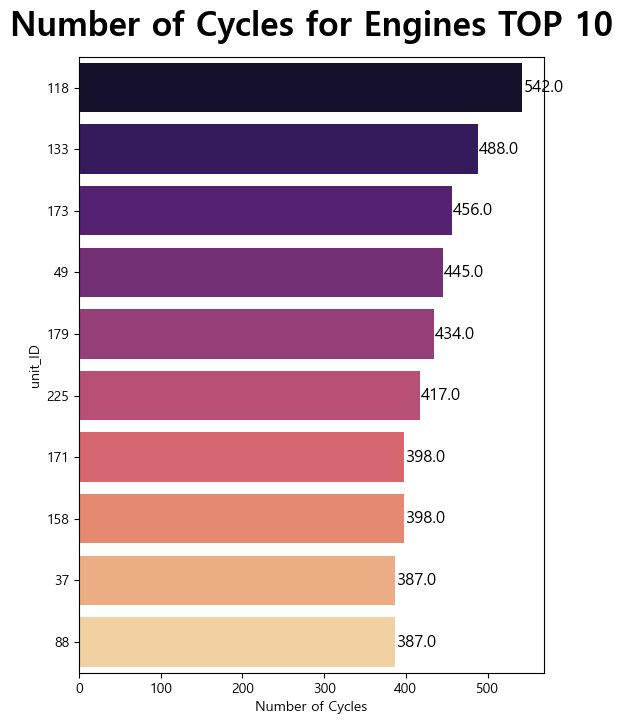

In [10]:
# RUL상위10 유닛
cnt_train_TOP10 = feature_df[['unit', 'RUL']].groupby('unit').max().sort_values(by='RUL', ascending=False).head(10)

cnt_ind = [str(i) for i in cnt_train_TOP10.index]
cnt_val = list(cnt_train_TOP10.RUL.values)


plt.figure(figsize=(6, 8))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), hue=cnt_ind, palette='magma')
for i in range(len(cnt_val)):
    plt.text(cnt_val[i]+2, i, str(cnt_val[i]), fontsize=12, va='center')
plt.xlabel('Number of Cycles')
plt.ylabel('unit_ID')
plt.title('Number of Cycles for Engines TOP 10', fontweight='bold', fontsize=24, pad=15)

plt.show();

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18912\2945135870.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


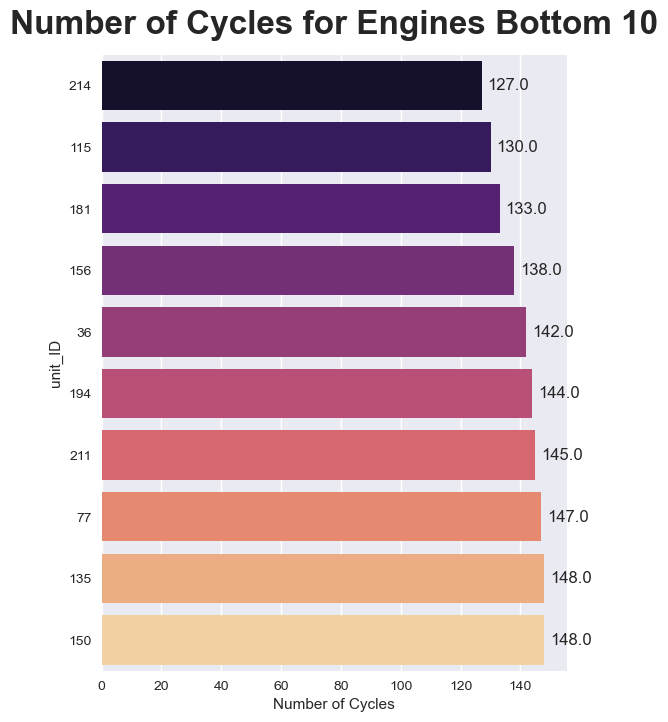

In [11]:
# RUL하위10 유닛
cnt_train_BOTTOM10 = feature_df[['unit', 'RUL']].groupby('unit').max().sort_values(by='RUL', ascending=True).head(10)

cnt_ind = [str(i) for i in cnt_train_BOTTOM10.index]
cnt_val = list(cnt_train_BOTTOM10.RUL.values)

plt.style.use("seaborn")
plt.figure(figsize=(6, 8))
sns.barplot(x=list(cnt_val), y=list(cnt_ind), hue=cnt_ind, palette='magma')
for i in range(len(cnt_val)):
    plt.text(cnt_val[i]+2, i, str(cnt_val[i]), fontsize=12, va='center')
plt.xlabel('Number of Cycles')
plt.ylabel('unit_ID')
plt.title('Number of Cycles for Engines Bottom 10', fontweight='bold', fontsize=24, pad=15)

plt.show();

In [12]:
feature_df.columns

Index(['unit', 'cycle', 'setting_1', 'setting_2', 'setting_3', 'T2', 'T24',
       'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'phi', 'NRf', 'NRc',
       'htBleed', 'Nf_dmd', 'RUL'],
      dtype='object')

---

#### 주요 변수 선택 아이디어

In [13]:
test_004 = test_004[feature]
test_004

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,13.60,332.52,2323.67,8704.98,313.03,2387.78,8048.98,362,2324
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,9.00,174.46,1915.21,7999.94,163.61,2028.09,7863.46,306,1915
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,5.69,137.34,2211.93,8305.38,129.98,2387.95,8071.13,328,2212
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,5.69,137.23,2211.89,8301.00,129.48,2387.90,8078.89,328,2212
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,7.97,192.94,2222.71,8331.05,181.82,2387.87,8057.83,333,2223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,5.72,138.34,2212.35,8351.73,130.87,2388.50,8112.61,331,2212
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,13.66,334.75,2324.23,8758.69,314.51,2388.33,8086.83,366,2324
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,8.00,194.92,2223.57,8370.49,182.76,2388.64,8100.84,336,2223
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,13.66,333.15,2324.19,8753.04,314.17,2388.37,8085.24,366,2324


In [14]:
test_004_cycle = test_004.groupby('unit').agg({'cycle': 'max'}).reset_index()
test_004_cycle.rename(columns={'cycle': 'max_cycle'}, inplace=True)

# compare per-unit cycles using groupby.transform to avoid alignment issues
mask = test_004['cycle'] == test_004.groupby('unit')['cycle'].transform('max')
X_test = test_004[mask].reset_index(drop=True)
X_test

,unit,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd
0,1,230,25.0070,0.6214,60.0,462.54,537.66,1264.31,1046.41,7.05,8.99,176.56,1915.66,8023.10,166.19,2028.53,7890.31,308,1915
1,2,153,41.9989,0.8400,100.0,445.00,549.96,1354.05,1133.55,3.91,5.72,139.03,2211.69,8310.36,130.17,2387.72,8073.44,331,2212
2,3,141,42.0005,0.8401,100.0,445.00,549.47,1341.06,1118.90,3.91,5.69,139.26,2212.04,8331.13,130.73,2388.18,8095.58,330,2212
3,4,208,25.0018,0.6207,60.0,462.54,536.06,1253.49,1038.53,7.05,9.00,175.63,1915.39,8012.46,164.91,2028.30,7878.63,306,1915
4,5,51,25.0039,0.6200,60.0,462.54,537.36,1263.60,1052.52,7.05,9.03,175.53,1915.36,8011.76,164.95,2028.24,7873.75,307,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,184,20.0037,0.7000,100.0,491.19,607.94,1488.25,1255.52,9.35,13.66,334.72,2324.21,8761.89,314.85,2388.39,8094.02,364,2324
244,245,63,20.0066,0.7017,100.0,491.19,606.61,1481.48,1238.30,9.35,13.65,336.64,2323.93,8726.74,315.99,2388.03,8066.79,363,2324
245,246,29,19.9982,0.7008,100.0,491.19,606.82,1483.01,1241.32,9.35,13.65,334.86,2323.90,8722.26,315.22,2388.02,8060.86,364,2324
246,247,94,25.0024,0.6216,60.0,462.54,536.91,1261.67,1052.33,7.05,9.03,175.84,1915.31,8006.63,164.60,2028.24,7878.48,307,1915


In [ ]:
X_train = feature_df.iloc[:, 1:-1]
X_test = X_test.iloc[:, 1:]
y_train = feature_df['RUL']
y_test = RUL_004['RUL']

In [51]:
X_test.drop(columns=['cycle'], inplace=True)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = feature_df.drop(columns=['unit', 'cycle', 'RUL'])
y = feature_df['RUL']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=int(0.01 * len(X_train)),
    random_state=42,
    verbose=1, # 학습 과정 출력
    max_features='sqrt'
)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   24.5s


RandomForestRegressor(max_depth=612, max_features='sqrt', random_state=42,
                      verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error

# Ensure test features match those used during training (drop 'cycle' if present)
# 한글 : 테스트 피처가 학습 시 사용된 피처와 일치하는지 확인 (필요 시 'cycle' 열 제거)
X_test_for_pred = X_test

y_pred = rf.predict(X_test_for_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", rmse)

Test RMSE: 38.761050640742354


c:\Users\ASUS\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<Figure size 1200x1000 with 0 Axes>

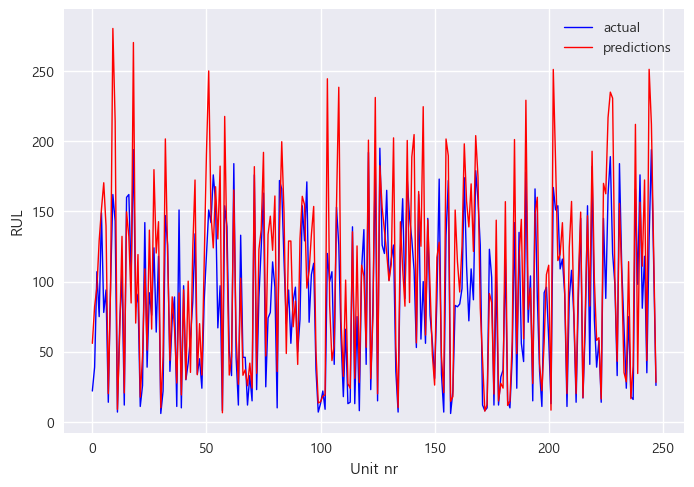

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))
fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Unit nr')

g = sns.lineplot(x = np.arange(0,len(test_004['unit'].unique())),
                y=y_test,
                color='blue',
                label = 'actual',
                linewidth=1,
                ax=ax)

f = sns.lineplot(x = np.arange(0,len(test_004['unit'].unique())),
                y=y_pred,
                color='red',
                label = 'predictions',
                linewidth=1,
                ax=ax)
ax.legend()

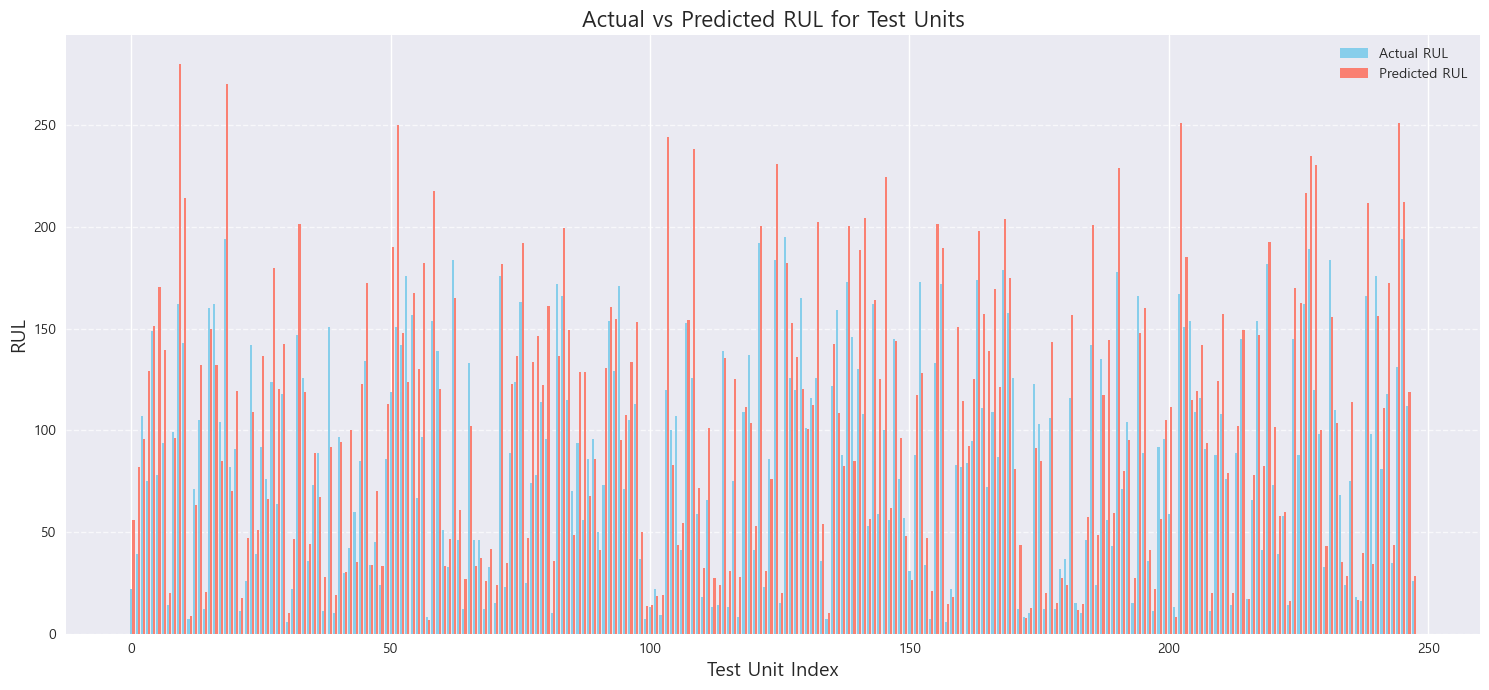

In [ ]:
# 실제 RUL과 예측 RUL을 바 플롯으로 시각화
plt.figure(figsize=(15, 7))

# 실제 RUL 플롯
plt.bar(range(len(y_test)), y_test, width=0.4, label='Actual RUL', color='skyblue')

# 예측 RUL 플롯 (실제 RUL 옆에 표시)
plt.bar(np.arange(len(y_pred)) + 0.4, y_pred, width=0.4, label='Predicted RUL', color='salmon')

plt.xlabel('Test Unit Index', fontsize=14)
plt.ylabel('RUL', fontsize=14)
plt.title('Actual vs Predicted RUL for Test Units', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

현재 상태 단순 std만 보고 변수 선택.

=> 변수 선택을 하는 기법 적용 후 StandardScaler까지 적용한 후에 전통적인 ML기법 적용할 필요가 있음.

그러고 나서 LSTM도 적용.

단일 모델만으로는 한계가 있을 수 있으므로 앙상블 모델도 고려.

In [ ]:
X_test

,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd
0,230,25.0070,0.6214,60.0,462.54,537.66,1264.31,1046.41,7.05,8.99,176.56,1915.66,8023.10,166.19,2028.53,7890.31,308,1915
1,153,41.9989,0.8400,100.0,445.00,549.96,1354.05,1133.55,3.91,5.72,139.03,2211.69,8310.36,130.17,2387.72,8073.44,331,2212
2,141,42.0005,0.8401,100.0,445.00,549.47,1341.06,1118.90,3.91,5.69,139.26,2212.04,8331.13,130.73,2388.18,8095.58,330,2212
3,208,25.0018,0.6207,60.0,462.54,536.06,1253.49,1038.53,7.05,9.00,175.63,1915.39,8012.46,164.91,2028.30,7878.63,306,1915
4,51,25.0039,0.6200,60.0,462.54,537.36,1263.60,1052.52,7.05,9.03,175.53,1915.36,8011.76,164.95,2028.24,7873.75,307,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,184,20.0037,0.7000,100.0,491.19,607.94,1488.25,1255.52,9.35,13.66,334.72,2324.21,8761.89,314.85,2388.39,8094.02,364,2324
244,63,20.0066,0.7017,100.0,491.19,606.61,1481.48,1238.30,9.35,13.65,336.64,2323.93,8726.74,315.99,2388.03,8066.79,363,2324
245,29,19.9982,0.7008,100.0,491.19,606.82,1483.01,1241.32,9.35,13.65,334.86,2323.90,8722.26,315.22,2388.02,8060.86,364,2324
246,94,25.0024,0.6216,60.0,462.54,536.91,1261.67,1052.33,7.05,9.03,175.84,1915.31,8006.63,164.60,2028.24,7878.48,307,1915


In [ ]:
rf.feature_importances_

array([3.80169170e-02, 2.10813451e-02, 7.97352871e-05, 1.68020385e-03,
       5.79936188e-02, 6.47059223e-02, 1.30940475e-01, 2.60527815e-03,
       5.35996341e-02, 6.04000953e-02, 7.39185857e-02, 7.37770311e-02,
       6.44608135e-02, 2.25125365e-01, 8.26352936e-02, 4.47009583e-02,
       4.27872800e-03])

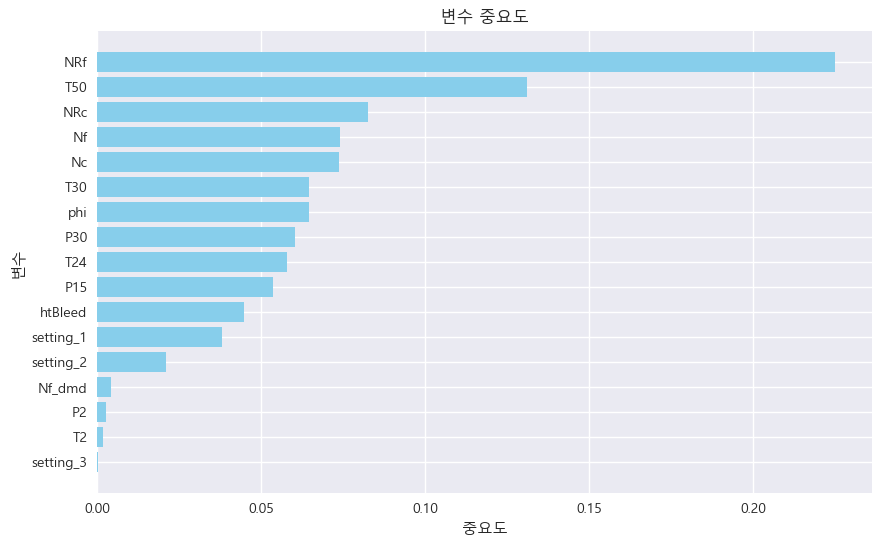

In [ ]:
# 변수 중요도 시각화
importances = rf.feature_importances_
feature_names = X_test.columns

importances, feature_names = zip(*sorted(zip(importances, feature_names)))
importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.title('변수 중요도')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show();

---

In [90]:
# 유닛별 최고 사이클만 남기기.
test_004_max_cycle = test_004.groupby('unit').agg({'cycle': 'max'}).reset_index()

X_test = pd.DataFrame(columns=X_test.columns)

for unit in test_004_max_cycle['unit']:
    X_test = pd.concat([X_test, test_004[(test_004['unit'] == unit) & (test_004['cycle'] == test_004_max_cycle[test_004_max_cycle['unit'] == unit]['cycle'].values[0])]]).reset_index(drop=True)

X_test.drop(columns=['unit'], inplace=True)
X_test

,cycle,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,phi,NRf,NRc,htBleed,Nf_dmd
0,230,25.0070,0.6214,60.0,462.54,537.66,1264.31,1046.41,7.05,8.99,176.56,1915.66,8023.10,166.19,2028.53,7890.31,308,1915
1,153,41.9989,0.8400,100.0,445.00,549.96,1354.05,1133.55,3.91,5.72,139.03,2211.69,8310.36,130.17,2387.72,8073.44,331,2212
2,141,42.0005,0.8401,100.0,445.00,549.47,1341.06,1118.90,3.91,5.69,139.26,2212.04,8331.13,130.73,2388.18,8095.58,330,2212
3,208,25.0018,0.6207,60.0,462.54,536.06,1253.49,1038.53,7.05,9.00,175.63,1915.39,8012.46,164.91,2028.30,7878.63,306,1915
4,51,25.0039,0.6200,60.0,462.54,537.36,1263.60,1052.52,7.05,9.03,175.53,1915.36,8011.76,164.95,2028.24,7873.75,307,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,184,20.0037,0.7000,100.0,491.19,607.94,1488.25,1255.52,9.35,13.66,334.72,2324.21,8761.89,314.85,2388.39,8094.02,364,2324
244,63,20.0066,0.7017,100.0,491.19,606.61,1481.48,1238.30,9.35,13.65,336.64,2323.93,8726.74,315.99,2388.03,8066.79,363,2324
245,29,19.9982,0.7008,100.0,491.19,606.82,1483.01,1241.32,9.35,13.65,334.86,2323.90,8722.26,315.22,2388.02,8060.86,364,2324
246,94,25.0024,0.6216,60.0,462.54,536.91,1261.67,1052.33,7.05,9.03,175.84,1915.31,8006.63,164.60,2028.24,7878.48,307,1915


In [91]:
X_train = feature_df.iloc[:, 1:-1]
y_train = feature_df['RUL']
y_test = RUL_004['RUL']

In [92]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(61249, 18) (248, 18) (61249,) (248,)


In [93]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=int(0.01 * len(X_train)),
    random_state=42,
    verbose=1, # 학습 과정 출력
    max_features='sqrt'
)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.7s


RandomForestRegressor(max_depth=612, max_features='sqrt', random_state=42,
                      verbose=1)

In [94]:
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest Test RMSE:", rf_rmse)

Random Forest Test RMSE: 38.761050640742354


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


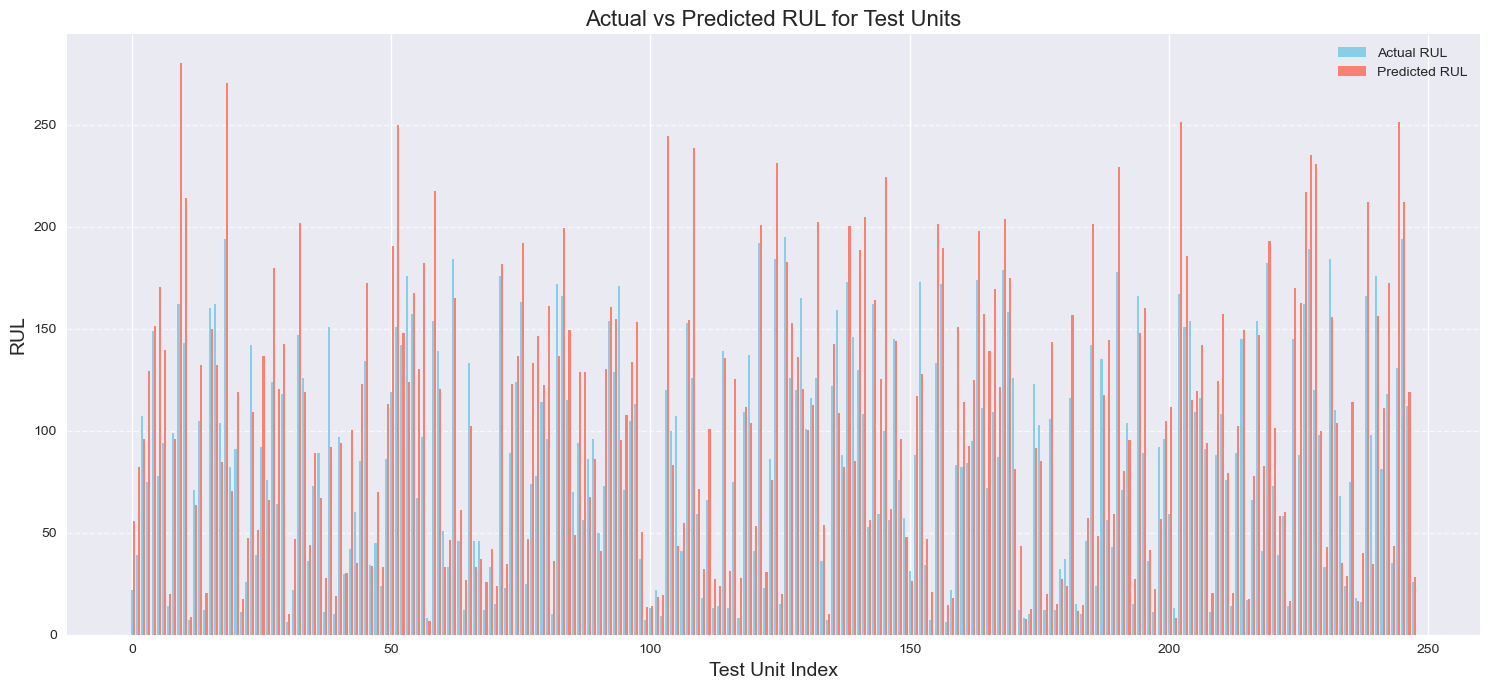

In [96]:
# 실제 RUL과 예측 RUL을 바 플롯으로 시각화
plt.figure(figsize=(15, 7))

# 실제 RUL 플롯
plt.bar(range(len(y_test)), y_test, width=0.4, label='Actual RUL', color='skyblue')

# 예측 RUL 플롯 (실제 RUL 옆에 표시)
plt.bar(np.arange(len(rf_pred)) + 0.4, rf_pred, width=0.4, label='Predicted RUL', color='salmon')

plt.xlabel('Test Unit Index', fontsize=14)
plt.ylabel('RUL', fontsize=14)
plt.title('Actual vs Predicted RUL for Test Units', fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import os

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = (
    "A realistic hospital room captured from a fisheye CCTV camera with a viewing angle wider than 180 degrees, "
    "showing a top-down view from the ceiling. "
    "One patient is lying on the floor next to the bed, and another patient is resting in the hospital bed. "
    "Realistic lighting, medical equipment, cinematic atmosphere."
)
num_images = 7 


output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)

for i in range(num_images):
    image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]
    image.save(os.path.join(output_dir, f"image_{i+1}.png"))
    print(f"✅ image_{i+1}.png 저장 완료")